# Module Project: Data Analysis Using Python

## Background

This project will cover all aspects of the Python for the Data Analytics module.  To complete the project, follow the instructions at each step in the notebook and add Python code or written explanations as instructed.   Some tasks below will require you to answer with a written response rather than writing code.  Those tasks begin with the words "Explain" or "Write".

## Grading
The grade for this project sums to 200 points.  The amount that each section contributes is indicated on each of the tasks.

## How to turn in 
***DO NOT*** sumbit this poject to your GitHub repository.  Instead you will need to submit your completed Jupyter notebook directly to Dr. Ficklin via Slack. The notebook should be saved, fully populated with results and images.


## Due Date
April 19th no later than Midnight

## Data Introducution

To complete this project you will need to retrieve the "Cover Type Dataset" available at the UC Irvine Machine Learning Repository. You can find information about the dataset as well as the data [here](https://archive.ics.uci.edu/ml/datasets/Covertype).  To download the data, click the link at the top that reads **Data Folder**.  On the resulting page you will find three files for download.  Please download the file named `covtype.data.gz`, and use your preferred decompression utility to uncompress the file.  

Before you can begin with this project, you must familarize yourself with the data.  Please read the `convtype.info` file that is also available for download.  You can either download the file and open with your favorite text editor or [view it in the web browser](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).

In Summary:

> Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes.  However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.  **One method of obtaining this information is through the use of predictive models.**  

> [The purpose of this dataset is for] predicting forest cover type from cartographic variables... The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data... Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 

>>>> An inholding is privately owned land inside the boundary of a national park, national forest, state park, or similar publicly owned, protected area.<<<<

>>>> cartography measures positions of places (mathematics was the science of measurement) and represents a the surface of a sphere on a two dimensional map. <<<<

Here are some hints to help explain some of the data columns:

- Slope:  The angle in degrees of the slope on which the forest cover is growing.  
- Aspect:  The direction the slope is facing in degrees azimuth:  North = 0, East = 90, South = 180, West = 270.
- The columns representing shade (Hillshade index at 9am, noon, 3pm) contain values from 0 to 255 with 0 meaning no sun and 255 meaning full sun.
- There are 40 columns representing differnet soil types (ST1-ST40).  See the `convtype.info` file for a listing of these types.  The observations in these 40 columns indicate if cover was: absent = 0, present = 1
- There are 4 columns representing 4 different wilderness areas (Rawah, Neota, Comanche_Peak, Cache_la_Poudre). The observations in these 4 columns indicate if cover was:  absent = 0, present = 1

## Objective
For this project you will utilize Numpy, Pandas, Matplotlib, Seaborn and Sklearn to create a Supervised Machine learning model that can assist natural resouce managers predict tree cover in neighboring lands.

## Tips
1. If you feel that your solution in a cell is too complicated, it probably is.  Check the online documentation and expect there may be shortcuts to do what you want.
2. If you encounter Memory Error or the notebook seems to not execute, you may need to restart the Kernel and re-run the cells.
3. Please contact the instructor if you have questions about this project.  You may ask any question you want!
4. Before turning in your notebook carefully re-read each step to ensure you've followed it correctly.

## Academic Honesty
You must work on your own to complete this project.  You should not work on this project together with other students. If you have questions please ask the instructurs or post them to the Slack channel where every student can see your question and benefit from any answers. You may consult the notebooks provided to you for the class or the online documentation for any of the tools (e.g. Numpy, Pandas, Seaborn, or Sklearn), but do not use online tutorials, or question/answer forums for solutions.  

---
## 1. Setup the Notebook
**1a.** Load all the necessary packages and libraries required for the entire notebook using the following (5 pts).

In [2]:
# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning: all modules coming from the sklearn 
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

---
## 2. Import the data
**2a.** First, import the data. Note, it does not have any headers. This is a large dataset so it may  take a minute to load (3 pts).

In [3]:
data = pd.read_csv("covtype.csv", header=None) #  renamed covtype.data as covtype.csv
data.head()

0    1   2    3    4     5    6    7    8     9  ...  45  46  47  48  49  \
0  2596   51   3  258    0   510  221  232  148  6279 ...   0   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225 ...   0   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121 ...   0   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211 ...   0   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172 ...   0   0   0   0   0   

   50  51  52  53  54  
0   0   0   0   0   5  
1   0   0   0   0   5  
2   0   0   0   0   2  
3   0   0   0   0   2  
4   0   0   0   0   5  

[5 rows x 55 columns]

**2b.** Display the first 10 lines of the data (3 pts).

In [4]:
data.head(10)

0    1   2    3    4     5    6    7    8     9  ...  45  46  47  48  49  \
0  2596   51   3  258    0   510  221  232  148  6279 ...   0   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225 ...   0   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121 ...   0   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211 ...   0   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172 ...   0   0   0   0   0   
5  2579  132   6  300  -15    67  230  237  140  6031 ...   0   0   0   0   0   
6  2606   45   7  270    5   633  222  225  138  6256 ...   0   0   0   0   0   
7  2605   49   4  234    7   573  222  230  144  6228 ...   0   0   0   0   0   
8  2617   45   9  240   56   666  223  221  133  6244 ...   0   0   0   0   0   
9  2612   59  10  247   11   636  228  219  124  6230 ...   0   0   0   0   0   

   50  51  52  53  54  
0   0   0   0   0   5  
1   0   0   0   0   5  
2   0   0   0   0   2  
3   0   0   0   0   2  
4   0   0   0   0   5  
5   0   0   0   0   2  
6   0   0   0   0   5  
7   0   0   0   0   5  
8   0   0   0   0   5  
9   0   0   0   0   5  

[10 rows x 55 columns]

**2c.** Add appropriate headers to the data frame, using the following array:

```python
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]
```
(3 pts)

In [111]:
data.columns 


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54],
           dtype='int64')

In [6]:
headers = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
           'Rawah', 'Neota', 'Comanche_Peak', 'Cache_la_Poudre', 
           'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7', 'ST8', 'ST9', 'ST10',
           'ST11', 'ST12', 'ST13', 'ST14', 'ST15', 'ST16', 'ST17', 'ST18', 'ST19', 'ST20',
           'ST21', 'ST22', 'ST23', 'ST24', 'ST25', 'ST26', 'ST27', 'ST28', 'ST29', 'ST30',
           'ST31', 'ST32', 'ST33', 'ST34', 'ST35', 'ST36', 'ST37', 'ST38', 'ST39', 'ST40',
           'Cover_Type'
           
]

data.columns = headers
data.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points     ...      ST32  ST33  ST34  ST35  \
0                                6279     ...         0     0     0     0   
1                                6225     ...         0     0     0     0   

   ST36  ST37  ST38  ST39  ST40  Cover_Type  
0     0     0     0     0     0           5  
1     0     0     0     0     0           5  

[2 rows x 55 columns]

**2d.** Display the first 10 lines of data again to confirm the headers are present (3 pts).

In [7]:
data.head(10)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   
5       2579     132      6                               300   
6       2606      45      7                               270   
7       2605      49      4                               234   
8       2617      45      9                               240   
9       2612      59     10                               247   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   
5                             -15                               67   
6                               5                              633   
7                               7                              573   
8                              56                              666   
9                              11                              636   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   
5            230             237            140   
6            222             225            138   
7            222             230            144   
8            223             221            133   
9            228             219            124   

   Horizontal_Distance_To_Fire_Points     ...      ST32  ST33  ST34  ST35  \
0                                6279     ...         0     0     0     0   
1                                6225     ...         0     0     0     0   
2                                6121     ...         0     0     0     0   
3                                6211     ...         0     0     0     0   
4                                6172     ...         0     0     0     0   
5                                6031     ...         0     0     0     0   
6                                6256     ...         0     0     0     0   
7                                6228     ...         0     0     0     0   
8                                6244     ...         0     0     0     0   
9                                6230     ...         0     0     0     0   

   ST36  ST37  ST38  ST39  ST40  Cover_Type  
0     0     0     0     0     0           5  
1     0     0     0     0     0           5  
2     0     0     0     0     0           2  
3     0     0     0     0     0           2  
4     0     0     0     0     0           5  
5     0     0     0     0     0           2  
6     0     0     0     0     0           5  
7     0     0     0     0     0           5  
8     0     0     0     0     0           5  
9     0     0     0     0     0           5  

[10 rows x 55 columns]

---
## 3. Explore the Data
**3a.** Show the dimensions of the data (3 pts).

In [114]:
data.shape

(581012, 55)

**3b.** Show the datatypes of all of the columns in the data (3 pts).

In [115]:
data.dtypes.head()

Elevation                           int64
Aspect                              int64
Slope                               int64
Horizontal_Distance_To_Hydrology    int64
Vertical_Distance_To_Hydrology      int64
dtype: object

**3c.** Show if the dataset has any missing values (3 pts).

In [8]:
data.isna().head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0      False   False  False                             False   
1      False   False  False                             False   
2      False   False  False                             False   
3      False   False  False                             False   
4      False   False  False                             False   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          False           False          False   
1          False           False          False   
2          False           False          False   
3          False           False          False   
4          False           False          False   

   Horizontal_Distance_To_Fire_Points     ...       ST32   ST33   ST34   ST35  \
0                               False     ...      False  False  False  False   
1                               False     ...      False  False  False  False   
2                               False     ...      False  False  False  False   
3                               False     ...      False  False  False  False   
4                               False     ...      False  False  False  False   

    ST36   ST37   ST38   ST39   ST40  Cover_Type  
0  False  False  False  False  False       False  
1  False  False  False  False  False       False  
2  False  False  False  False  False       False  
3  False  False  False  False  False       False  
4  False  False  False  False  False       False  

[5 rows x 55 columns]

In [13]:
data.isna().sum().head() # the isna() method (or it's alias isnull()) to count and then sum() to count the NaN values. 

Elevation                           0
Aspect                              0
Slope                               0
Horizontal_Distance_To_Hydrology    0
Vertical_Distance_To_Hydrology      0
dtype: int64

**3d.** Show how many rows of data are duplicated (3 pts).

In [117]:
data.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [118]:
data.duplicated().sum()

0

**3e.** Show how many unique values there are per column (3 pts).

In [119]:
data.nunique().head()

Elevation                           1978
Aspect                               361
Slope                                 67
Horizontal_Distance_To_Hydrology     551
Vertical_Distance_To_Hydrology       700
dtype: int64

---
## 4. Clean the Data
### 4.1. Missing Values
**4a.** If the dataset had missing values, determine if you need to clean the data. If so, show the code below. If you do not perform any cleaning indicate why (change the cell to "raw" type to write your explanation)  (3 pts).

### 4.2 Duplicated Data
**4b.** If the dataset had duplicated values, determine if you need to clean the data. If so, show the code below. If not, describe the status of duplicated data in this dataset (change the cell to "raw" type to write your explanation)  (3 pts).

**5b.** Explain if the unique number of values or each of the categorical columns (non numeric and non binary) match what is expected based on the description of the data  (3 pts).

### 4.3 Fix Categorical Data
Some of the columns are categorical (i.e. qualitative).  Remember, just becauase a column contains numbers does not mean it is quantitative. In the online description of the data, the authors stated that the soil types and wilderness areas are qualitative (categorical). You must decide if this is true given the dataset.

**4c.** Write the names of the columns that are categorical (3 pts).

**4e.** Change all categorical columns that were imported as a numeric type to a string type  (3 pts).

In [17]:
# The observations in the 40 columns representing differnet soil types (ST1-ST40) indicate if cover was: absent = 0, present = 1
# The observations in the 4 columns representing 4 different wilderness areas (Rawah, Neota, Comanche_Peak, Cache_la_Poudre) indicate if cover was: absent = 0, present = 1, 
# Forest cover type is designated as an integer value, which ranges from 1 to 7

In [85]:
#def change_col(x):
#    if x == 0:
#      return "absent"
#    if x == 1:
#        return "present"
# data["ST1"].apply(change_col).head()


In [9]:
df2 =data.loc[:, 'Rawah':'ST40'].replace([0,1], ['absent', 'present'])
df2.head(2)

Rawah   Neota Comanche_Peak Cache_la_Poudre     ST1     ST2     ST3  \
0  present  absent        absent          absent  absent  absent  absent   
1  present  absent        absent          absent  absent  absent  absent   

      ST4     ST5     ST6   ...      ST31    ST32    ST33    ST34    ST35  \
0  absent  absent  absent   ...    absent  absent  absent  absent  absent   
1  absent  absent  absent   ...    absent  absent  absent  absent  absent   

     ST36    ST37    ST38    ST39    ST40  
0  absent  absent  absent  absent  absent  
1  absent  absent  absent  absent  absent  

[2 rows x 44 columns]

In [10]:
df3 =data.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
df3.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points  
0                                6279  
1                                6225

In [12]:
df4 = data['Cover_Type']
df4.head(2)

0    5
1    5
Name: Cover_Type, dtype: int64

In [13]:
new_data = pd.concat([df3, df2, df4], axis=1)
new_data.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points    ...        ST32    ST33    ST34  \
0                                6279    ...      absent  absent  absent   
1                                6225    ...      absent  absent  absent   

     ST35    ST36    ST37    ST38    ST39    ST40 Cover_Type  
0  absent  absent  absent  absent  absent  absent          5  
1  absent  absent  absent  absent  absent  absent          5  

[2 rows x 55 columns]

In [20]:
new_data.shape

(581012, 55)

**4d.** Confirm that all categorical columns are no longer numeric (3 pts).

In [123]:
new_data.dtypes.head()

Elevation                           int64
Aspect                              int64
Slope                               int64
Horizontal_Distance_To_Hydrology    int64
Vertical_Distance_To_Hydrology      int64
dtype: object

**4e.** The `Cover_Type` column is a string but appears numeric, and each number represents a unique class of trees. Convert the numeric values to their corresponding string representations. Print the top 10 entries to confirm your replacement worked (5 pts).

In [14]:
new_data['Cover_Type'].replace([1,2,3,4,5,6,7], ['Spruce/Fir','Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz'], inplace=True)
new_data.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points    ...        ST32    ST33    ST34  \
0                                6279    ...      absent  absent  absent   
1                                6225    ...      absent  absent  absent   

     ST35    ST36    ST37    ST38    ST39    ST40 Cover_Type  
0  absent  absent  absent  absent  absent  absent      Aspen  
1  absent  absent  absent  absent  absent  absent      Aspen  

[2 rows x 55 columns]

### 4.4 Subset the Data
The dataset is a bit large for this notebook. It will consume too much RAM on your computer.  If we were executing this on a computer with more RAM we might just write a Python script to do the work rather than use a Jupyter notebook.  To reduce the dataset we should subset our data to save resources. 

**4f.** Before we subset the data, let's explore the number of samples per cover type.  For the `Cover_type` column, show the counts of each type of cover, and sort the results from largest to smallest (5 pts).

In [15]:
new_data['Cover_Type'].count()

581012

In [16]:
new_data["Cover_Type"].nunique()

7

In [17]:
cover_subtype = new_data.groupby("Cover_Type")
cover_subtype.count()

Elevation  Aspect   Slope  \
Cover_Type                                     
Aspen                   9493    9493    9493   
Cottonwood/Willow       2747    2747    2747   
Douglas-fir            17367   17367   17367   
Krummholz              20510   20510   20510   
Lodgepole Pine        283301  283301  283301   
Ponderosa Pine         35754   35754   35754   
Spruce/Fir            211840  211840  211840   

                   Horizontal_Distance_To_Hydrology  \
Cover_Type                                            
Aspen                                          9493   
Cottonwood/Willow                              2747   
Douglas-fir                                   17367   
Krummholz                                     20510   
Lodgepole Pine                               283301   
Ponderosa Pine                                35754   
Spruce/Fir                                   211840   

                   Vertical_Distance_To_Hydrology  \
Cover_Type                                          
Aspen                                        9493   
Cottonwood/Willow                            2747   
Douglas-fir                                 17367   
Krummholz                                   20510   
Lodgepole Pine                             283301   
Ponderosa Pine                              35754   
Spruce/Fir                                 211840   

                   Horizontal_Distance_To_Roadways  Hillshade_9am  \
Cover_Type                                                          
Aspen                                         9493           9493   
Cottonwood/Willow                             2747           2747   
Douglas-fir                                  17367          17367   
Krummholz                                    20510          20510   
Lodgepole Pine                              283301         283301   
Ponderosa Pine                               35754          35754   
Spruce/Fir                                  211840         211840   

                   Hillshade_Noon  Hillshade_3pm  \
Cover_Type                                         
Aspen                        9493           9493   
Cottonwood/Willow            2747           2747   
Douglas-fir                 17367          17367   
Krummholz                   20510          20510   
Lodgepole Pine             283301         283301   
Ponderosa Pine              35754          35754   
Spruce/Fir                 211840         211840   

                   Horizontal_Distance_To_Fire_Points   ...      ST31    ST32  \
Cover_Type                                              ...                     
Aspen                                            9493   ...      9493    9493   
Cottonwood/Willow                                2747   ...      2747    2747   
Douglas-fir                                     17367   ...     17367   17367   
Krummholz                                       20510   ...     20510   20510   
Lodgepole Pine                                 283301   ...    283301  283301   
Ponderosa Pine                                  35754   ...     35754   35754   
Spruce/Fir                                     211840   ...    211840  211840   

                     ST33    ST34    ST35    ST36    ST37    ST38    ST39  \
Cover_Type                                                                  
Aspen                9493    9493    9493    9493    9493    9493    9493   
Cottonwood/Willow    2747    2747    2747    2747    2747    2747    2747   
Douglas-fir         17367   17367   17367   17367   17367   17367   17367   
Krummholz           20510   20510   20510   20510   20510   20510   20510   
Lodgepole Pine     283301  283301  283301  283301  283301  283301  283301   
Ponderosa Pine      35754   35754   35754   35754   35754   35754   35754   
Spruce/Fir         211840  211840  211840  211840  211840  211840  211840   

                     ST40  
Cover_Type                 
Aspen                9493  
Cottonwood/Wi

**4g.**  The results of the previous cell show that the number of measurements per cover type is imbalanced with the smallest having 2,747 observations and the largest 283,301.  Let's subset the data to only include 2,000 randomly selected samples from each cover type.   We have not covered in class how to do this, so below is a code sample you can use. 
```python
df = df.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)
```
Notice in the line of code above, we first perform a `groupby` operation to organize rows by their cover type. Next, we  call `apply` on each group. With the `apply` function you must provide the name of the function that will be called for each group. In this case, the word `lambda` tells python that we are declaring an "anonymous" in-line function (no `def` line) that takes an argument `x`.  As the apply is executed on each group, the variable `x` contains the data for each group, and is actually a Pandas DataFrame. Hence, we can call `sample` to select 2000 random rows.  The `apply` function returns a new DataFrame containing all selected rows from all groups.  On this data frame we call `reset_index` to renumber the index for all of our rows.

(3 pts)

In [18]:
new_subset = new_data.groupby(by="Cover_Type").apply(lambda x : x.sample(2000)).reset_index(drop=True)
new_subset.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2948     115     23                               351   
1       2763     246     15                               201   
2       2832     130     20                               607   
3       2964     233      9                                30   
4       2927      90      1                               382   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             121                             1146   
1                              11                             1677   
2                              54                             2126   
3                               8                             1648   
4                              90                             1208   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            252             210             72   
1            189             250            198   
2            248             224             94   
3            205             249            180   
4            221             236            151   

   Horizontal_Distance_To_Fire_Points    ...         ST32    ST33    ST34  \
0                                 451    ...       absent  absent  absent   
1                                2255    ...       absent  absent  absent   
2                                1809    ...       absent  absent  absent   
3                                1558    ...      present  absent  absent   
4                                 872    ...      present  absent  absent   

     ST35    ST36    ST37    ST38    ST39    ST40 Cover_Type  
0  absent  absent  absent  absent  absent  absent      Aspen  
1  absent  absent  absent  absent  absent  absent      Aspen  
2  absent  absent  absent  absent  absent  absent      Aspen  
3  absent  absent  absent  absent  absent  absent      Aspen  
4  absent  absent  absent  absent  absent  absent      Aspen  

[5 rows x 55 columns]

**4h.** Re-run the same command from task 4f. The results should show an even 2,000 samples of each cover type (3 pts).

In [129]:
new_subset.groupby("Cover_Type").size().sort_values(ascending=False)

Cover_Type
Spruce/Fir           2000
Ponderosa Pine       2000
Lodgepole Pine       2000
Krummholz            2000
Douglas-fir          2000
Cottonwood/Willow    2000
Aspen                2000
dtype: int64

### 4.4 Tidy or not to Tidy?

You'll notice that this dataset is not tidy!  We have a variable in the headers:  the different soil types.  To tidy this data we would normally melt the soil types into a single column, perhaps named `Soil_Type`. We could then remove all rows where the soil type was not present (i.e. has a value of 0) and drop the melted values column with the absent/present binary value.  

However, as we've learned in class, the Sklearn package which we will use for machine learning cannot handle strings for categorical data.  It wants categorical data reset as numeric values: one for each category. But this only works for ordinal data.  Our soil type data is not ordinal.  If we melted our dataframe, then for machine learning we would need to perform ["One Hot Encoding"](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) to put the `Soil_Type` column dataframe into a format that Sklearn approves of. The end result is a pivot of the dataframe back to what it currently is!  So, even though we should Tidy this dataset, let's leave it as is for Sklearn.

---
## 5. Understand the data
### 5.1  Review Categorical Data

**5a.** Generate a dataframe that contains the number of times we see a soil type present for each cover type.  Show the top 10 rows of the dataframe.

Hint:
- Start with a reduced dataframe that only contains the 40 soil types + `Cover_Type`
- Melt the data.
- Exclude soil types that are absent.
- Use a `groupby`.

(5 pts)

In [19]:
df5 = pd.concat([df2, new_data['Cover_Type']], axis=1)
df5.head()

Rawah   Neota Comanche_Peak Cache_la_Poudre     ST1     ST2     ST3  \
0  present  absent        absent          absent  absent  absent  absent   
1  present  absent        absent          absent  absent  absent  absent   
2  present  absent        absent          absent  absent  absent  absent   
3  present  absent        absent          absent  absent  absent  absent   
4  present  absent        absent          absent  absent  absent  absent   

      ST4     ST5     ST6       ...          ST32    ST33    ST34    ST35  \
0  absent  absent  absent       ...        absent  absent  absent  absent   
1  absent  absent  absent       ...        absent  absent  absent  absent   
2  absent  absent  absent       ...        absent  absent  absent  absent   
3  absent  absent  absent       ...        absent  absent  absent  absent   
4  absent  absent  absent       ...        absent  absent  absent  absent   

     ST36    ST37    ST38    ST39    ST40      Cover_Type  
0  absent  absent  absent  absent  absent           Aspen  
1  absent  absent  absent  absent  absent           Aspen  
2  absent  absent  absent  absent  absent  Lodgepole Pine  
3  absent  absent  absent  absent  absent  Lodgepole Pine  
4  absent  absent  absent  absent  absent           Aspen  

[5 rows x 45 columns]

In [20]:
reduced_df = df5.loc[:, 'ST1':'Cover_Type']
reduced_df.head()

ST1     ST2     ST3     ST4     ST5     ST6     ST7     ST8     ST9  \
0  absent  absent  absent  absent  absent  absent  absent  absent  absent   
1  absent  absent  absent  absent  absent  absent  absent  absent  absent   
2  absent  absent  absent  absent  absent  absent  absent  absent  absent   
3  absent  absent  absent  absent  absent  absent  absent  absent  absent   
4  absent  absent  absent  absent  absent  absent  absent  absent  absent   

     ST10       ...          ST32    ST33    ST34    ST35    ST36    ST37  \
0  absent       ...        absent  absent  absent  absent  absent  absent   
1  absent       ...        absent  absent  absent  absent  absent  absent   
2  absent       ...        absent  absent  absent  absent  absent  absent   
3  absent       ...        absent  absent  absent  absent  absent  absent   
4  absent       ...        absent  absent  absent  absent  absent  absent   

     ST38    ST39    ST40      Cover_Type  
0  absent  absent  absent           Aspen  
1  absent  absent  absent           Aspen  
2  absent  absent  absent  Lodgepole Pine  
3  absent  absent  absent  Lodgepole Pine  
4  absent  absent  absent           Aspen  

[5 rows x 41 columns]

In [21]:
df6 = pd.melt(reduced_df, id_vars=['Cover_Type'],  var_name='soil_type', value_name='status')
df6.head()

Cover_Type soil_type  status
0           Aspen       ST1  absent
1           Aspen       ST1  absent
2  Lodgepole Pine       ST1  absent
3  Lodgepole Pine       ST1  absent
4           Aspen       ST1  absent

In [22]:
df6.tail()

Cover_Type soil_type  status
23240475  Ponderosa Pine      ST40  absent
23240476  Ponderosa Pine      ST40  absent
23240477  Ponderosa Pine      ST40  absent
23240478  Ponderosa Pine      ST40  absent
23240479  Ponderosa Pine      ST40  absent

In [23]:
df6.groupby(by="Cover_Type").count()

soil_type    status
Cover_Type                            
Aspen                 379720    379720
Cottonwood/Willow     109880    109880
Douglas-fir           694680    694680
Krummholz             820400    820400
Lodgepole Pine      11332040  11332040
Ponderosa Pine       1430160   1430160
Spruce/Fir           8473600   8473600

In [136]:
df6.shape

(23240480, 3)

In [24]:
df6.groupby(by="Cover_Type").count()

soil_type    status
Cover_Type                            
Aspen                 379720    379720
Cottonwood/Willow     109880    109880
Douglas-fir           694680    694680
Krummholz             820400    820400
Lodgepole Pine      11332040  11332040
Ponderosa Pine       1430160   1430160
Spruce/Fir           8473600   8473600

In [25]:
# Drop row by condition
df7=df6[df6.status != 'absent']
df7.head()

Cover_Type soil_type   status
1911  Ponderosa Pine       ST1  present
1951  Ponderosa Pine       ST1  present
1968  Ponderosa Pine       ST1  present
1979  Ponderosa Pine       ST1  present
1982  Ponderosa Pine       ST1  present

In [139]:
df7.shape

(581012, 3)

In [26]:
df7.reset_index(inplace=False).head() 


index      Cover_Type soil_type   status
0   1911  Ponderosa Pine       ST1  present
1   1951  Ponderosa Pine       ST1  present
2   1968  Ponderosa Pine       ST1  present
3   1979  Ponderosa Pine       ST1  present
4   1982  Ponderosa Pine       ST1  present

In [141]:
df7.shape

(581012, 3)

In [27]:
df7.tail()

Cover_Type soil_type   status
23222956  Spruce/Fir      ST40  present
23222957  Spruce/Fir      ST40  present
23222958  Spruce/Fir      ST40  present
23223082  Spruce/Fir      ST40  present
23223083  Spruce/Fir      ST40  present

In [48]:
# df8=df7.drop('index',axis=1)
# df8.head()

In [30]:
ct_st = df7.groupby(by="Cover_Type")
ct_count = ct_st.count()
ct_count

soil_type  status
Cover_Type                          
Aspen                   9493    9493
Cottonwood/Willow       2747    2747
Douglas-fir            17367   17367
Krummholz              20510   20510
Lodgepole Pine        283301  283301
Ponderosa Pine         35754   35754
Spruce/Fir            211840  211840

In [31]:
scatter_data = ct_count.drop(['status'], axis=1)
scatter_data.reset_index(inplace=True) # I want to convert Cover_Type index to column of the data frame
scatter_data

Cover_Type  soil_type
0              Aspen       9493
1  Cottonwood/Willow       2747
2        Douglas-fir      17367
3          Krummholz      20510
4     Lodgepole Pine     283301
5     Ponderosa Pine      35754
6         Spruce/Fir     211840

**5b.** Using the dataframe just created, draw a plot showing the relationship between the cover type and the soil type. Size the points in the plot by the counts. Ensure that the axis ticks and legend are legible. Save the figure to a file named `covtype-soil_type.scatter.png` for viewing (5 pts). 

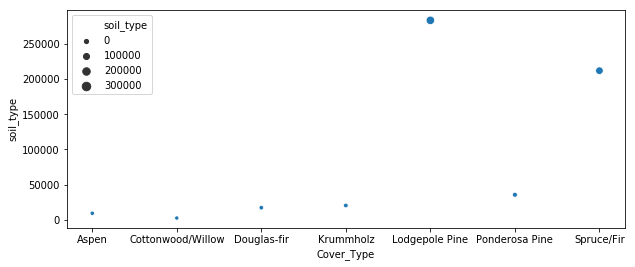

In [32]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(10,4))

# Create scatterplot
sns.scatterplot(x='Cover_Type', y="soil_type", size="soil_type", data=scatter_data, ax=ax)

# Show plot
plt.show()

In [35]:
fig.savefig('covtype-soil_type.scatter.png', format='png', bbox_inches = "tight", dpi=72)


**5c.** Explain why it is important to review the scatterplot of "Cover_Type" vs. all the soil types (3 pts).

### 5.2 Review the quantitative data
**5d.** Show the basic summary statistics for the quantitiatve data, excluding the 40 binary soil type columns (3 pts).

In [38]:
# Elevation, 
# Aspect, 
# Slope, 
# Horizontal_Distance_To_Hydrology, 
# Vertical_Distance_To_Hydrology, 
# Horizontal_Distance_To_Roadways, ...
# Hillshade_9am, 
# Hillshade_Noon, 
# Hillshade_3pm, 
# Horizontal_Distance_To_Fire_Points

qdata = new_data.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
qdata.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

In [39]:
qdata2 = pd.concat([qdata, df5['Cover_Type']], axis=1)
qdata2.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points      Cover_Type  
0                                6279           Aspen  
1                                6225           Aspen  
2                                6121  Lodgepole Pine  
3                                6211  Lodgepole Pine  
4                                6172           Aspen

**5e.** Use the [hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of Pandas Dataframes to create a single figure showing the histograms of every quantitative data column excluding the 40 binary soil type columns.  Size the figure to ensure all text is legible. Save the figure to a file named `covtype.histograms.png` for viewing. 

Hint:
- Because you will use the `DataFrame.hist` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.

(5 pts)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013D802D7A58>,
      dtype=object)

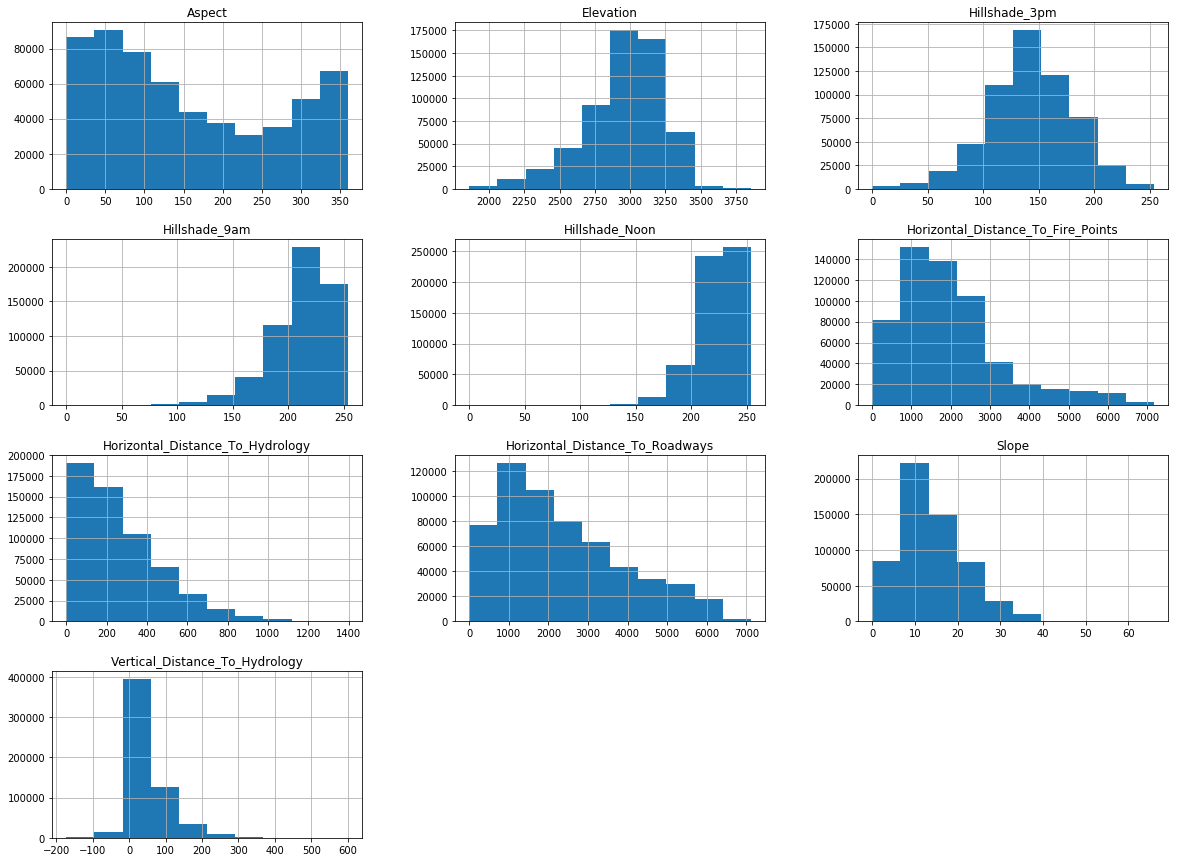

In [40]:
# DataFrame.hist(column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, **kwds)
# fig=plt.figure(figsize=(17,10))

h_gram = qdata.hist(figsize = (20, 15)) 
h_gram

In [49]:
plt.savefig('covtype.histograms.png', format='png', bbox_inches = "tight", dpi=72)

<Figure size 432x288 with 0 Axes>

**5f.** Explain why it is important to examine the histogram of each quantitative column (3 pts).

**5g.** Use the Seaborn [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function to gererate a scatterplot of every quantitative column (excluding the 40 binary soil type columns) with every other quantitative column.  Use `Cover_Type` as the `hue` argument, use `"kde"` as the `diag_kind` argument, and use `5` as the `height` argument.  Because each scatterplot will be small we need to limit the size and number of points. Otherwise, the points overlap which and will hide the color of those behind.  Include only 1000 randomly selected rows from the dataset.  To further improve the plot we can set the size of the point size using the `plot_kws` argument.  Set it using the dictionary: `{"s": 15}`.

Hint: 
- Use the `qual_cols` argument to only include the list of columns you want to plot.
- Use the `sample` function to limit the number of points.

The plot will be huge! You can view it in the notebook but it will be difficult to read the labels. Therefore, save the figure to a file named `covtype.pairplot.png` for viewing. It will take a few minutes to display the plot.

(5 pts)

C:\Users\rmann\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


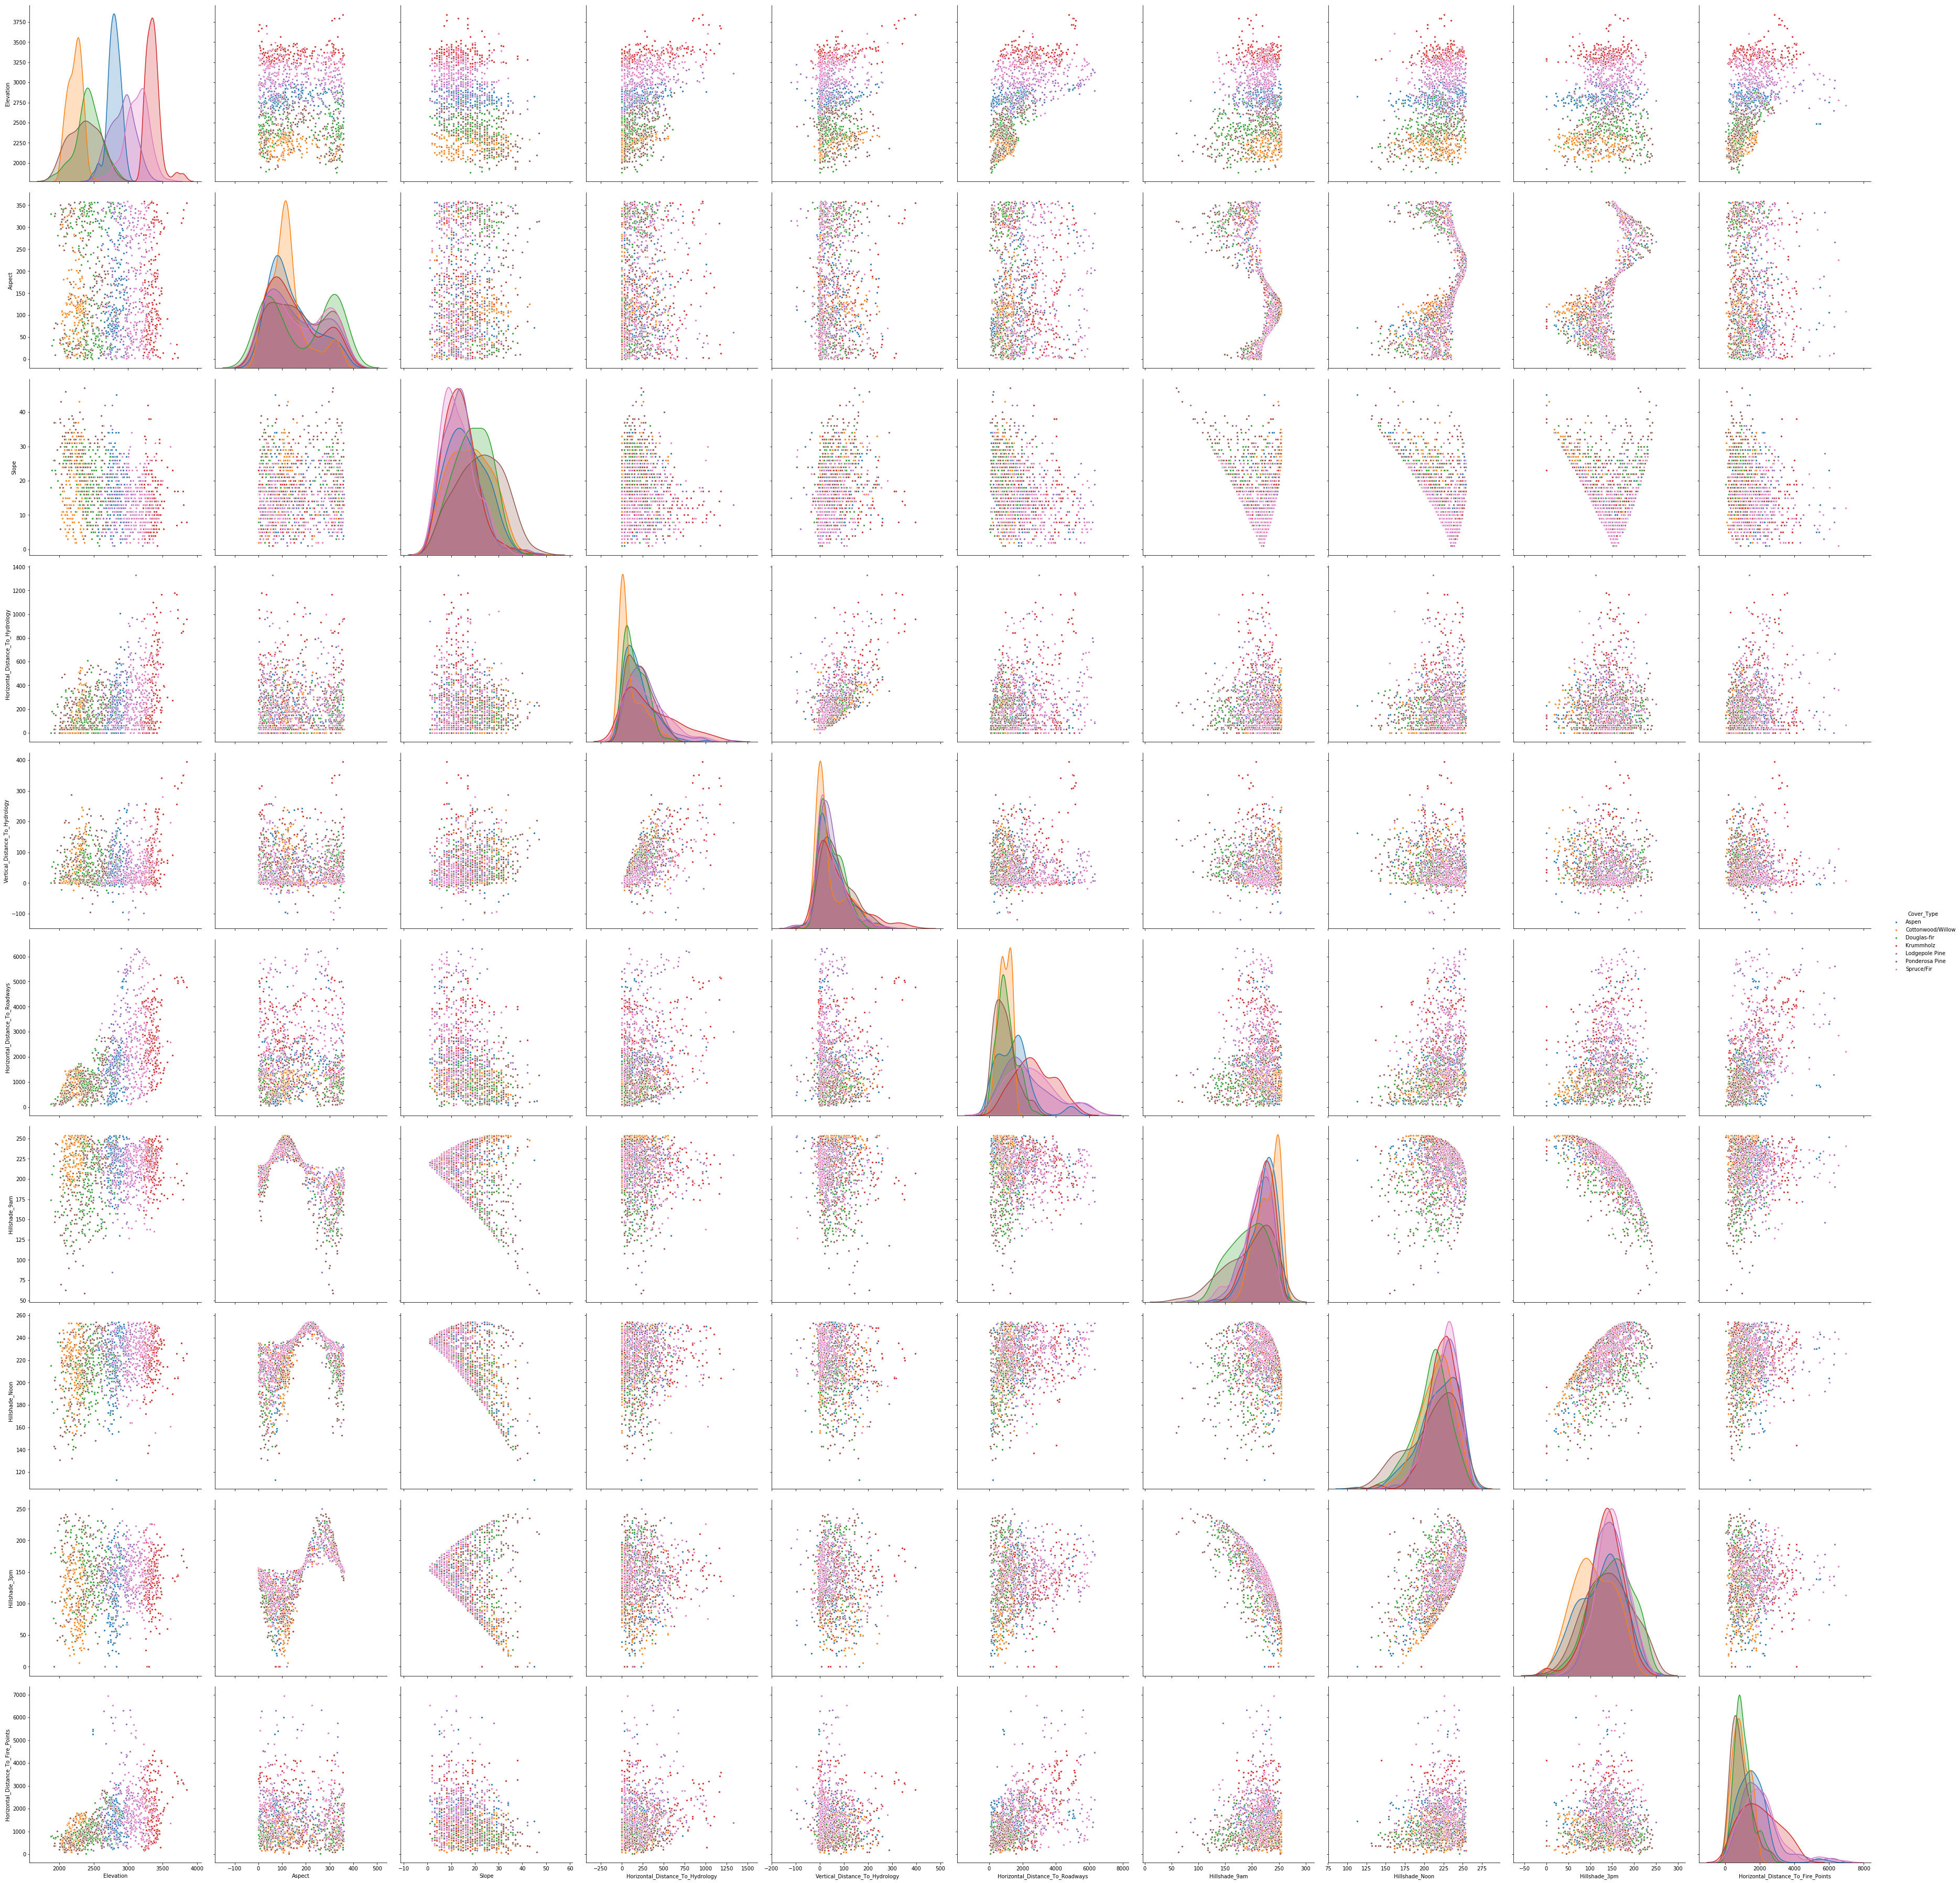

In [46]:
# Using sample function to limit the number of points:
reduced_subset = new_data.groupby(by="Cover_Type").apply(lambda x : x.sample(200)).reset_index(drop=True)

scatterplot  = sns.pairplot(reduced_subset, hue='Cover_Type', diag_kind="kde", height=5, plot_kws={"s": 15})
scatterplot 

In [50]:
scatterplot.savefig('covtype.pairplot.png', format='png', dpi=72)

**5h.** Explain why it is important to examine the pairwise scatterplots of all quantitative columns  (3 pts).

**5i.** Create 10 figures such that each figure corresponds to a single quantitative column in the data.  Each figure should contain 7 boxplots, one for each cover type, and should have a title indicating the quantitative column it describes. Save each figure using the naming scheme: `covtype-{column_name}.boxplot.png`. Replace the tag `{column_name}` with the name of the column represented by the figure.  Exclude outliers from the plots.

Hints: 
1. First, group the dataframe by `Cover_type`
2. Second, loop over all the names of quantitative columns.
3. Third, you can create a boxplot using the dataframe summary statistics:
   ```python
   # Create a boxplot using the descriptive summary of the data and the built-in plot function
   # of dataframes.
   df.describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90);
   ```
4. Because you will use the `DataFrame.plot` function you aren't calling matplotlib or Seaborn functions directly.  Therefore, use the `plt.savefig` function to save each plot. Remember, the `plt` object always maintains the current figure, so you can use it to call the `savefig` function.
5. Do not limit the numer of rows as in the pairplot.

(8 pts)

In [158]:
qdata2.head(2)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   

   Horizontal_Distance_To_Fire_Points Cover_Type  
0                                6279      Aspen  
1                                6225      Aspen

In [159]:
box_data = qdata2.groupby(by="Cover_Type")
box_data 

In [160]:
box_data.describe()

Aspect                                                   \
                      count        mean         std  min   25%    50%    75%   
Cover_Type                                                                     
Aspen                9493.0  139.283051   91.568676  0.0  71.0  111.0  191.0   
Cottonwood/Willow    2747.0  137.139425   86.996931  0.0  83.5  119.0  159.0   
Douglas-fir         17367.0  180.539068  133.786561  0.0  43.0  173.0  319.0   
Krummholz           20510.0  153.236226  110.648845  0.0  66.0  123.0  240.0   
Lodgepole Pine     283301.0  152.060515  107.658352  0.0  60.0  127.0  241.0   
Ponderosa Pine      35754.0  176.372490  107.582644  0.0  90.0  160.0  284.0   
Spruce/Fir         211840.0  156.138227  116.677893  0.0  52.0  122.0  278.0   

                         Elevation               ...   Slope        \
                     max     count         mean  ...     75%   max   
Cover_Type                                       ...                 
Aspen              359.0    9493.0  2787.417571  ...    22.0  51.0   
Cottonwood/Willow  359.0    2747.0  2223.939934  ...    26.0  46.0   
Douglas-fir        360.0   17367.0  2419.181897  ...    25.0  54.0   
Krummholz          360.0   20510.0  3361.928669  ...    18.0  51.0   
Lodgepole Pine     360.0  283301.0  2920.936061  ...    18.0  66.0   
Ponderosa Pine     360.0   35754.0  2394.509845  ...    27.0  50.0   
Spruce/Fir         360.0  211840.0  3128.644888  ...    17.0  56.0   

                  Vertical_Distance_To_Hydrology                               \
                                           count       mean        std    min   
Cover_Type                                                                      
Aspen                                     9493.0  50.610344  57.827970 -134.0   
Cottonwood/Willow                         2747.0  41.186749  59.052920  -25.0   
Douglas-fir                              17367.0  45.437439  46.987262 -126.0   
Krummholz                                20510.0  69.474305  79.882861  -84.0   
Lodgepole Pine                          283301.0  45.884219  57.487644 -173.0   
Ponderosa Pine                           35754.0  62.446915  58.911774 -134.0   
Spruce/Fir                              211840.0  42.156939  56.628398 -156.0   

                                             
                    25%   50%    75%    max  
Cover_Type                                   
Aspen               6.0  35.0   81.0  265.0  
Cottonwood/Willow   0.0   6.0   72.0  270.0  
Douglas-fir         8.0  34.0   73.0  288.0  
Krummholz           8.0  43.0  107.0  412.0  
Lodgepole Pine      8.0  30.0   66.0  601.0  
Ponderosa Pine     18.0  50.0   95.0  312.0  
Spruce/Fir          4.0  24.0   62.0  431.0  

[7 rows x 80 columns]

In [161]:
box_data['Aspect'].describe()

count        mean         std  min   25%    50%    75%  \
Cover_Type                                                                     
Aspen                9493.0  139.283051   91.568676  0.0  71.0  111.0  191.0   
Cottonwood/Willow    2747.0  137.139425   86.996931  0.0  83.5  119.0  159.0   
Douglas-fir         17367.0  180.539068  133.786561  0.0  43.0  173.0  319.0   
Krummholz           20510.0  153.236226  110.648845  0.0  66.0  123.0  240.0   
Lodgepole Pine     283301.0  152.060515  107.658352  0.0  60.0  127.0  241.0   
Ponderosa Pine      35754.0  176.372490  107.582644  0.0  90.0  160.0  284.0   
Spruce/Fir         211840.0  156.138227  116.677893  0.0  52.0  122.0  278.0   

                     max  
Cover_Type                
Aspen              359.0  
Cottonwood/Willow  359.0  
Douglas-fir        360.0  
Krummholz          360.0  
Lodgepole Pine     360.0  
Ponderosa Pine     360.0  
Spruce/Fir         360.0

In [162]:
box_data.dtypes

Aspect Elevation Hillshade_3pm Hillshade_9am Hillshade_Noon  \
Cover_Type                                                                      
Aspen              int64     int64         int64         int64          int64   
Cottonwood/Willow  int64     int64         int64         int64          int64   
Douglas-fir        int64     int64         int64         int64          int64   
Krummholz          int64     int64         int64         int64          int64   
Lodgepole Pine     int64     int64         int64         int64          int64   
Ponderosa Pine     int64     int64         int64         int64          int64   
Spruce/Fir         int64     int64         int64         int64          int64   

                  Horizontal_Distance_To_Fire_Points  \
Cover_Type                                             
Aspen                                          int64   
Cottonwood/Willow                              int64   
Douglas-fir                                    int64   
Krummholz                                      int64   
Lodgepole Pine                                 int64   
Ponderosa Pine                                 int64   
Spruce/Fir                                     int64   

                  Horizontal_Distance_To_Hydrology  \
Cover_Type                                           
Aspen                                        int64   
Cottonwood/Willow                            int64   
Douglas-fir                                  int64   
Krummholz                                    int64   
Lodgepole Pine                               int64   
Ponderosa Pine                               int64   
Spruce/Fir                                   int64   

                  Horizontal_Distance_To_Roadways  Slope  \
Cover_Type                                                 
Aspen                                       int64  int64   
Cottonwood/Willow                           int64  int64   
Douglas-fir                                 int64  int64   
Krummholz                                   int64  int64   
Lodgepole Pine                              int64  int64   
Ponderosa Pine                              int64  int64   
Spruce/Fir                                  int64  int64   

                  Vertical_Distance_To_Hydrology  
Cover_Type                                        
Aspen                                      int64  
Cottonwood/Willow                          int64  
Douglas-fir                                int64  
Krummholz                                  int64  
Lodgepole Pine                             int64  
Ponderosa Pine                             int64  
Spruce/Fir                                 int64

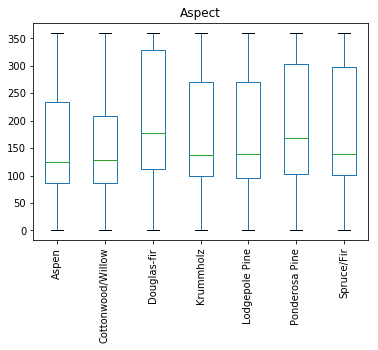

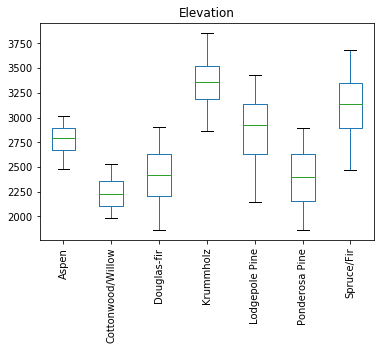

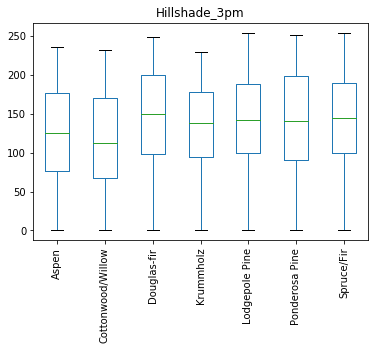

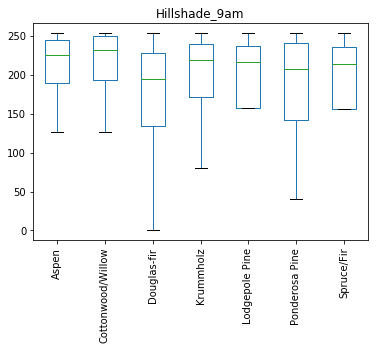

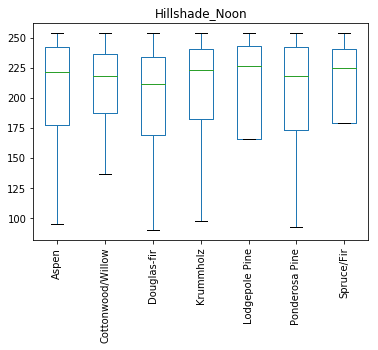

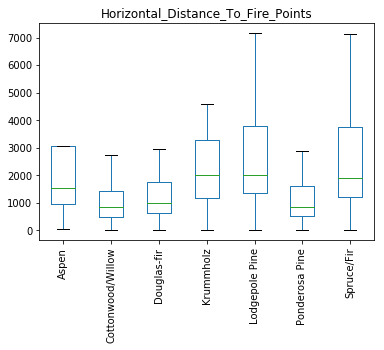

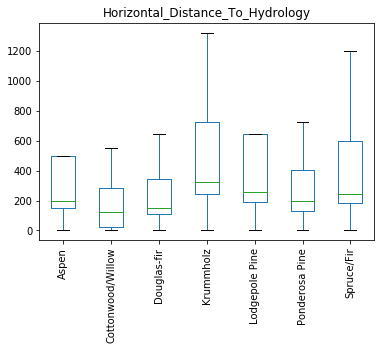

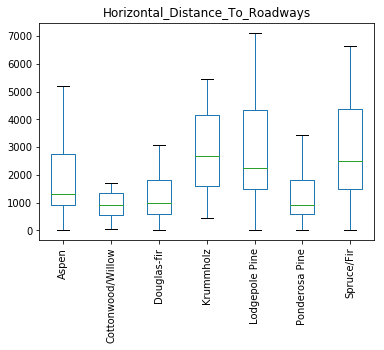

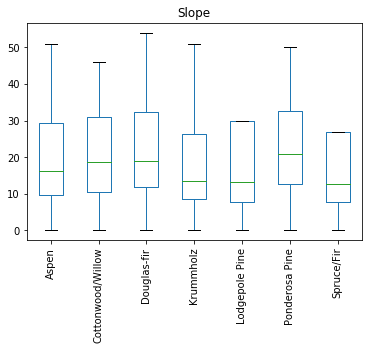

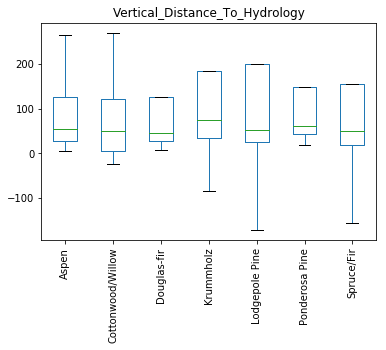

In [203]:
quant_cols = ['Aspect',
            'Elevation',
            'Hillshade_3pm',
            'Hillshade_9am',
            'Hillshade_Noon',
            'Horizontal_Distance_To_Fire_Points',
            'Horizontal_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'Slope',
            'Vertical_Distance_To_Hydrology'] # quantitative columns in melted data

for col in quant_cols: 
    box_data[col].describe().transpose().plot(kind="box", title=col, showfliers=False, rot=90)
    plot.figure.savefig('covtype-{col}.boxplot.png', format='png', bbox_inches = "tight", dpi=72)
    

In [ ]:
['Aspect',
            'Elevation',
            'Hillshade_3pm',
            'Hillshade_9am',
            'Hillshade_Noon',
            'Horizontal_Distance_To_Fire_Points',
            'Horizontal_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'Slope',
            'Vertical_Distance_To_Hydrology']

In [101]:
# box_data['Hillshade_9am'].describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90)
# box_data['Horizontal_Distance_To_Roadways'].describe().transpose().plot(kind="box", title="my plot", showfliers=False, rot=90)

**5j.** Explain why it is important to review the distribution of the "Cover_Type" column with every other quantitative data column (3 pts).

### 5.3 Check for outliers

**5k.** Identify if any quantitative columns have outliers. Do this by generating a **single** figure containing one boxplot for each quantitative column (excluding the 40 binary soil type columns). Save the figure as `covtype-outlier_check.png`. Unlike the previous 10 figures you do not need to create separate boxplots by cover type (5 pts).

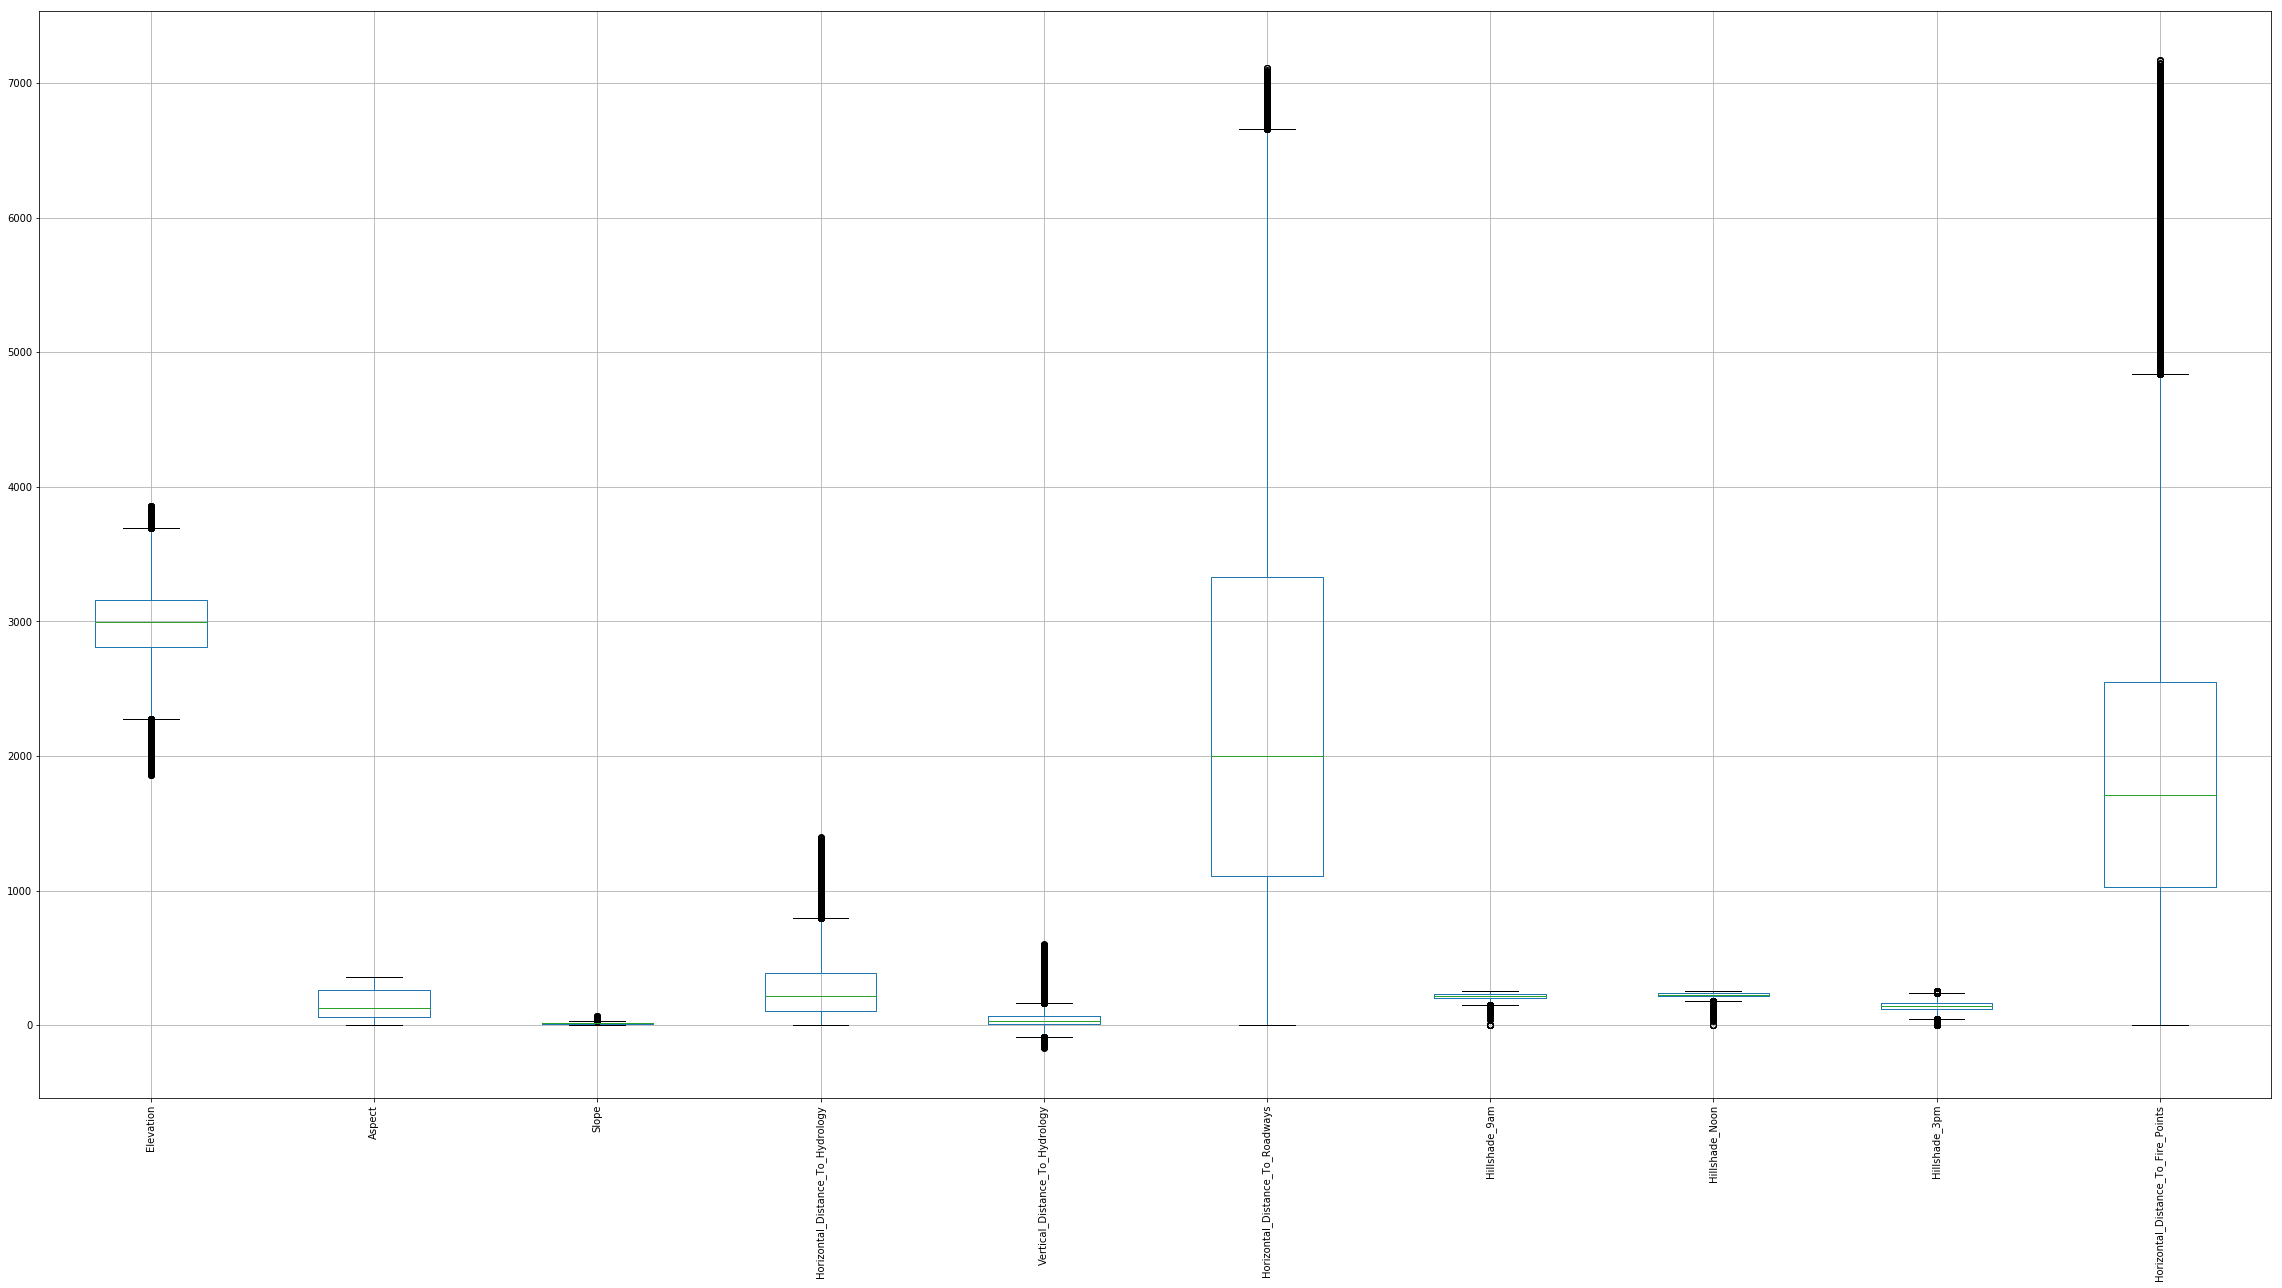

In [176]:
plot = qdata2.boxplot(rot=90, figsize=(40,20)); # rot: int (default: 90), a rotation angle to show X-axis labels.
plot


In [204]:
plot.figure.savefig('covtype-outlier_check.png', format='png', bbox_inches = "tight", dpi=72)

**5l.** Explain why it is important to look for outliers prior to using machine learning techniques (3 pts).

---
## 6. Make assumptions

**6a.** Explain which columns of data would be poor predictors of cover type. Justify your answer by referring to the plots from Section 5 (3 pts).

**6b.** Write which columns you expect can contribute to prediction of cover type? (3 pts).

---
## 7. Perform Supervised Machine Learning
### 7.1 Prepare the Data

**7a.** Create a subset of the original data that contains only the columns you indicated in task 6b and the `Cover_Type` column.  Print the list of remaining columns to verify the dataframe has the columns you want to keep:

Hint:
- Drop all column from the dataset not deemed predictive.

(3 pts)

In [55]:
new_subset.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2565     291      9                               175   
1       2766     123     13                               324   
2       2804      82     19                                90   
3       2573     357      5                               255   
4       2740     137     32                               201   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              28                             1315   
1                             128                             1591   
2                              41                             1698   
3                              21                             1484   
4                             -65                              541   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            194             239            184   
1            241             230            116   
2            242             204             84   
3            213             231            157   
4            249             208             60   

   Horizontal_Distance_To_Fire_Points    ...        ST32     ST33    ST34  \
0                                1332    ...      absent   absent  absent   
1                                 902    ...      absent   absent  absent   
2                                1595    ...      absent  present  absent   
3                                1645    ...      absent   absent  absent   
4                                 376    ...      absent   absent  absent   

     ST35    ST36    ST37    ST38    ST39    ST40 Cover_Type  
0  absent  absent  absent  absent  absent  absent      Aspen  
1  absent  absent  absent  absent  absent  absent      Aspen  
2  absent  absent  absent  absent  absent  absent      Aspen  
3  absent  absent  absent  absent  absent  absent      Aspen  
4  absent  absent  absent  absent  absent  absent      Aspen  

[5 rows x 55 columns]

In [60]:
subset1 = new_subset.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
subset1.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2565     291      9                               175   
1       2766     123     13                               324   
2       2804      82     19                                90   
3       2573     357      5                               255   
4       2740     137     32                               201   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              28                             1315   
1                             128                             1591   
2                              41                             1698   
3                              21                             1484   
4                             -65                              541   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            194             239            184   
1            241             230            116   
2            242             204             84   
3            213             231            157   
4            249             208             60   

   Horizontal_Distance_To_Fire_Points  
0                                1332  
1                                 902  
2                                1595  
3                                1645  
4                                 376

In [61]:
subset2 = pd.concat([subset1, new_subset['Cover_Type']], axis=1) 
subset2.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2565     291      9                               175   
1       2766     123     13                               324   
2       2804      82     19                                90   
3       2573     357      5                               255   
4       2740     137     32                               201   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              28                             1315   
1                             128                             1591   
2                              41                             1698   
3                              21                             1484   
4                             -65                              541   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            194             239            184   
1            241             230            116   
2            242             204             84   
3            213             231            157   
4            249             208             60   

   Horizontal_Distance_To_Fire_Points Cover_Type  
0                                1332      Aspen  
1                                 902      Aspen  
2                                1595      Aspen  
3                                1645      Aspen  
4                                 376      Aspen

In [62]:
subset2.shape

(14000, 11)

**7b.** For machine learning we need to separate the column containing our dependent variable `Cover_Type` from the independent variables.  Create a Numpy array containing the dependent variable `Cover_Type`. Name it `Y` (3 pts).

In [63]:
Y = subset2['Cover_Type'].values
Y

array(['Aspen', 'Aspen', 'Aspen', ..., 'Spruce/Fir', 'Spruce/Fir',
       'Spruce/Fir'], dtype=object)

**7c.** Create a 2D numpy array containing only the independent variables (i.e. all of the predictive columns). Name it `X` (3 pts).

In [65]:
X = subset2.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points'].values

X

array([[2565,  291,    9, ...,  239,  184, 1332],
       [2766,  123,   13, ...,  230,  116,  902],
       [2804,   82,   19, ...,  204,   84, 1595],
       ...,
       [3336,    2,    8, ...,  224,  154, 1855],
       [3418,  325,   20, ...,  213,  186, 1289],
       [3158,   63,    7, ...,  225,  132, 2630]], dtype=int64)

### 7.2 Normalize the data
Many machine learning algorithms expect that the quantitative columns have a mean centered at 0 with data points scaled to unit variance.  See the [preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) for Sklearn.

**7d**.  Normalize the `X` dataframe using the [preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) or [preprocessing.robust_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function of Sklearn. Choose the method most appropriate given the state of outliers in the data. (5 pts).

In [66]:
X = preprocessing.robust_scale(X) # robust_scaling, tries to normalize taking into account outliers which we did not remove
X

array([[-2.56830601e-01,  8.69109948e-01, -5.00000000e-01, ...,
         5.66666667e-01,  7.66666667e-01,  3.45640220e-02],
       [ 1.77595628e-02, -1.04712042e-02, -1.66666667e-01, ...,
         2.66666667e-01, -3.66666667e-01, -3.03220738e-01],
       [ 6.96721311e-02, -2.25130890e-01,  3.33333333e-01, ...,
        -6.00000000e-01, -9.00000000e-01,  2.41162608e-01],
       ...,
       [ 7.96448087e-01, -6.43979058e-01, -5.83333333e-01, ...,
         6.66666667e-02,  2.66666667e-01,  4.45404556e-01],
       [ 9.08469945e-01,  1.04712042e+00,  4.16666667e-01, ...,
        -3.00000000e-01,  8.00000000e-01,  7.85545954e-04],
       [ 5.53278689e-01, -3.24607330e-01, -6.66666667e-01, ...,
         1.00000000e-01, -1.00000000e-01,  1.05420267e+00]])

### 7.3 Split the data for testing and validation

**7e.** Use Sklearn to create a testing model by dividing the two numpy arrays into two groups, one with 80%, which will be used for training the models, and one with 20%, which will be used for validating the models.  A random seed is required. Use a seed  of `7`.  Name your trainig sets `Xt` and `Yt` and the validation sets `Xv` and `Yv` respectively (3 pts).

In [67]:
# Split-out validation dataset
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2) 


In [68]:
len(Xt) # should return 80% of total rows to be the training dataset

11200

In [69]:
len(Xv) # should return 20% of total rows to be the test/validation dataset

2800

**7f.** We want to perform a 10-fold cross-validation scheme to estimate accuracy.  This will split our training dataset into 10 pieces, train on 9, test on 1 and repeat for all combinations.  Create a KFold model object for use later when running the machine learning alogrithms. Use a random state seed of `7`.  Name the KFold object `kfold` (3 pts).

In [70]:
kfold = model_selection.KFold(n_splits=10, random_state=10)
kfold

KFold(n_splits=10, random_state=10, shuffle=False)

### 7.3 Evaulate ML approaches
Using the training data created in task 7e and the KFold model created in task 7f, we will now execute a variety of ML algorithms.

**7g**. First, we want to store the results of all ML algorithms that we'll be using. Remember we'll be performing  a 10-fold cross-validation scheme so this will yield 10 results for each algorithm.   You will store the results of each ML algorithm into its approriate element of the dictionary.  Execute the following code to initialize a python dictionary where results will be stored.

```python
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
```
(3 pts)

In [71]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}

**7h.** Create two variables. One named `scoring` and the other `error_score`.  Set the value of `scoring` to `"accuracy"` and the `error_score` to `np.nan`. You will use these two variables for model section of every ML method below (3 pts).

In [64]:
scoring = "accuracy"
error_score = np.nan

**7i.** Execute the `LogisticRegression` algorithm and save the results in the `results` dictionary.  Use the following arguments:  `solver` as `"lbfgs"` and  `multi_class` as `"auto"` (3 pts).

In [72]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto")

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

C:\Users\rmann\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rmann\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rmann\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rmann\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rmann\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

array([0.63303571, 0.63303571, 0.66160714, 0.63035714, 0.62232143,
       0.62678571, 0.63660714, 0.64464286, 0.6375    , 0.63928571])

In [73]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.

# re-set max_iter parameter from 100 to 200

alg = LogisticRegression(solver='lbfgs', multi_class="auto", max_iter=200)
alg 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold,
                                                                scoring="accuracy", error_score=np.nan)

In [75]:
# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

array([0.63214286, 0.63571429, 0.6625    , 0.63125   , 0.62321429,
       0.62678571, 0.63571429, 0.64464286, 0.63660714, 0.63928571])

**7j.** Execute the `KNeighborsClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [76]:
# Create the KNeighborsClassifier object with defaults.
alg = KNeighborsClassifier()
alg

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [77]:
# Execute the cross-validation strategy
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

In [78]:

# Take a look at the scores for each of the 10-fold runs.
results['KNeighborsClassifier']

array([0.675     , 0.71071429, 0.70357143, 0.69107143, 0.70089286,
       0.71339286, 0.7       , 0.70535714, 0.70714286, 0.68125   ])

**7k.** Execute the `LinearDiscriminantAnalysis` algorithm and save the results in the `results` dictionary (3 pts).

In [79]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()
alg

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [80]:
# Execute the cross-validation strategy
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

In [81]:
# Take a look at the scores for each of the 10-fold runs.
results['LinearDiscriminantAnalysis']

array([0.60446429, 0.61160714, 0.65267857, 0.61160714, 0.61160714,
       0.61071429, 0.60892857, 0.63839286, 0.61607143, 0.61964286])

**7l.** Execute the `DecisionTreeClassifier` algorithm and save the results in the `results` dictionary (3 pts).

In [82]:
# Create the DecisionTreeClassifier object with defaults.
alg = DecisionTreeClassifier()
alg


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
# Execute the cross-validation strategy
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

In [84]:
# Take a look at the scores for each of the 10-fold runs.
results['DecisionTreeClassifier']

array([0.70892857, 0.73482143, 0.74107143, 0.72857143, 0.73839286,
       0.72321429, 0.71607143, 0.74017857, 0.76071429, 0.70089286])

**7m.** Execute the `GaussianNB` algorithm and save the results in the `results` dictionary (3 pts).

In [85]:
# Create the GaussianNB object with defaults.
alg = GaussianNB()
alg

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
# Execute the cross-validation strategy
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

In [87]:
# Take a look at the scores for each of the 10-fold runs.
results['GaussianNB']

array([0.57321429, 0.58482143, 0.62410714, 0.59107143, 0.55535714,
       0.60625   , 0.55803571, 0.58928571, 0.56875   , 0.575     ])

**7n.** Execute the `SVC` algorithm and save the results in the `results` dictionary. Use `auto` as the the `gamma` arument (3 pts).

In [88]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')
alg

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
# Execute the cross-validation strategy
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)

In [90]:
# Take a look at the scores for each of the 10-fold runs.
results['SVC']

array([0.72410714, 0.72232143, 0.74107143, 0.70178571, 0.70267857,
       0.71607143, 0.725     , 0.71875   , 0.70803571, 0.71071429])

**7o.** Create a figure of boxplots that shows the distribution of results from each method. Save the figure using the name `covtype.ML_results.png` (5 pts).

In [ ]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}

In [96]:
# Pass dictionary in Dataframe constructor to create a new object:
df_results = pd.DataFrame(results) 

df_results


LogisticRegression  LinearDiscriminantAnalysis  KNeighborsClassifier  \
0            0.632143                    0.604464              0.675000   
1            0.635714                    0.611607              0.710714   
2            0.662500                    0.652679              0.703571   
3            0.631250                    0.611607              0.691071   
4            0.623214                    0.611607              0.700893   
5            0.626786                    0.610714              0.713393   
6            0.635714                    0.608929              0.700000   
7            0.644643                    0.638393              0.705357   
8            0.636607                    0.616071              0.707143   
9            0.639286                    0.619643              0.681250   

   DecisionTreeClassifier  GaussianNB       SVC  
0                0.708929    0.573214  0.724107  
1                0.734821    0.584821  0.722321  
2                0.741071    0.624107  0.741071  
3                0.728571    0.591071  0.701786  
4                0.738393    0.555357  0.702679  
5                0.723214    0.606250  0.716071  
6                0.716071    0.558036  0.725000  
7                0.740179    0.589286  0.718750  
8                0.760714    0.568750  0.708036  
9                0.700893    0.575000  0.710714

In [97]:
df_results.describe()

LogisticRegression  LinearDiscriminantAnalysis  KNeighborsClassifier  \
count           10.000000                   10.000000             10.000000   
mean             0.636786                    0.618571              0.698839   
std              0.010893                    0.015139              0.012606   
min              0.623214                    0.604464              0.675000   
25%              0.631473                    0.610938              0.693304   
50%              0.635714                    0.611607              0.702232   
75%              0.638616                    0.618750              0.706696   
max              0.662500                    0.652679              0.713393   

       DecisionTreeClassifier  GaussianNB        SVC  
count               10.000000   10.000000  10.000000  
mean                 0.729286    0.582589   0.717054  
std                  0.017611    0.021309   0.011938  
min                  0.700893    0.555357   0.701786  
25%                  0.717857    0.569866   0.708705  
50%                  0.731696    0.579911   0.717411  
75%                  0.739732    0.590625   0.723661  
max                  0.760714    0.624107   0.741071

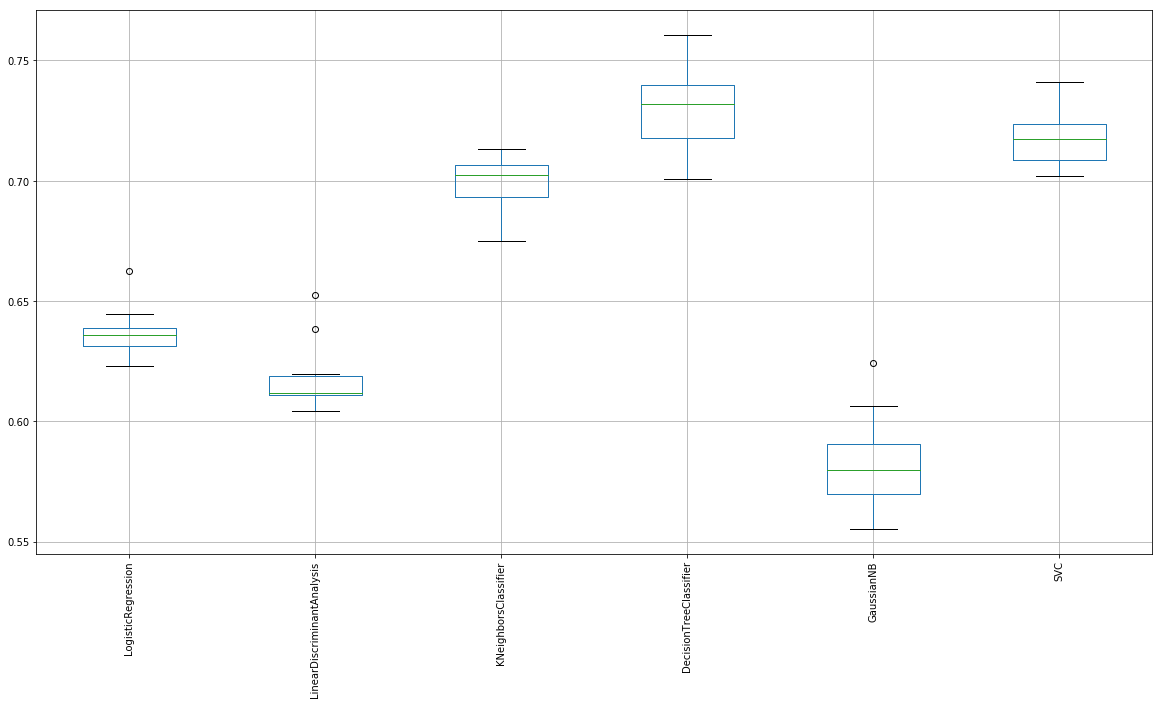

In [188]:
# then create a figure of boxplots:

figure =df_results.boxplot(rot=90, figsize=(20,10))
figure


In [197]:
figure.figure.savefig('covtype.ML_results.png', format='png', bbox_inches = "tight", dpi=72)

**7p.** Write which algorithm you feel performed the best and explain (3 pts).

### 7.4 Make Predictions!

**7q.** Using the algorithm that performs the best, use it to make a prediction using the `Xv` validation we set aside earlier (4 pts).

In [99]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')

# Create a new model using all of the training data.
alg.fit(Xt, Yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(Xv)

# Let's see the predictions
predictions

array(['Cottonwood/Willow', 'Ponderosa Pine', 'Douglas-fir', ..., 'Aspen',
       'Cottonwood/Willow', 'Douglas-fir'], dtype=object)

**7r**.  Show the accuracy score of the prediction (4 pts).

In [100]:
accuracy_score(Yv, predictions)

0.7210714285714286

**7s** Show the confusion matrix.  Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

In [101]:
labels = ['Spruce/Fir','Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
cm = confusion_matrix(Yv, predictions, labels=labels)
print(cm)

[[261  52   0   0  22   3  58]
 [ 87 168  20   1  79  25  11]
 [  0   3 230  48  18 106   0]
 [  0   0  21 382   0  14   0]
 [  6  26  18   0 336  18   0]
 [  0   7  61  44  13 255   0]
 [ 19   0   0   0   1   0 387]]


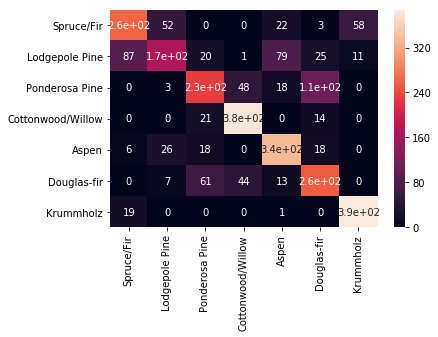

In [102]:
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

**7t.** Print the classifcation report. Be sure to use the `print` function to ensure printing in the notebook looks good (4 pts).

In [103]:
cr = classification_report(Yv, predictions)
print(cr)

                   precision    recall  f1-score   support

            Aspen       0.72      0.83      0.77       404
Cottonwood/Willow       0.80      0.92      0.86       417
      Douglas-fir       0.61      0.67      0.64       380
        Krummholz       0.85      0.95      0.90       407
   Lodgepole Pine       0.66      0.43      0.52       391
   Ponderosa Pine       0.66      0.57      0.61       405
       Spruce/Fir       0.70      0.66      0.68       396

        micro avg       0.72      0.72      0.72      2800
        macro avg       0.71      0.72      0.71      2800
     weighted avg       0.71      0.72      0.71      2800



## 8. Summarize

**8a**.  Explain in your own words the meaning of the results in last three cells of Section 7. How well did the algorithm perform? (3 pts).

**8b.** Write if there anything you would do differently to try to improve the quality of the prediction (3 pts).